# Interpreting Least Squares and Multiple Regression Models

You are a data analyst for an NFL team and wish to create a model for the number of possible wins in a season based on the following variables. 

the data set that is being used has the following variables:
    
|  Variable |  Representation of the averages per game for each team |
| --- | -- | 
| <div style="text-align: left"> of_yds_per_g </div> | <div style="text-align: center"> Offensive yards per game </div> |
| <div style="text-align: left"> df_yds_per_g </div> | <div style="text-align: center"> Defensive(gave up) yards per game </div> |
| <div style="text-align: left"> of_pts_per_g </div> | <div style="text-align: center"> Offensive pts per game </div> |
| <div style="text-align: left"> df_pts_per_g </div> | <div style="text-align: center"> Defensive (gave up) pts   per game </div> |


The response variable will be wins


## Step 1: Data Preparation

In [327]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [328]:
# Read in the data
nfl_df = pd.read_csv('nfl_project2.csv')
nfl_df.head()

,Team,of_yds_per_g,df_yds_per_g,of_pts_per_g,df_pts_per_g,wins
0,Atlanta Falcons,253.9,276.9,15.0,18.1,10
1,Baltimore Colts,256.7,369.4,14.9,26.3,6
2,Buffalo Bills,289.4,324.2,18.9,22.1,6
3,Chicago Bears,278.7,292.5,15.8,17.1,8
4,Cincinnati Bengals,304.5,289.5,15.8,17.8,5


In [329]:
nfl_df.describe()

,of_yds_per_g,df_yds_per_g,of_pts_per_g,df_pts_per_g,wins
count,28.000000,28.000000,28.000000,28.000000,28.000000
mean,300.664286,300.660714,18.339286,18.332143,8.964286
std,33.581799,28.615450,2.988167,3.229959,2.755226
min,237.600000,243.300000,13.700000,12.200000,3.000000
25%,279.000000,283.725000,15.750000,16.650000,7.000000
50%,301.500000,302.800000,17.650000,18.300000,9.000000
75%,314.225000,314.275000,21.075000,19.575000,10.250000
max,372.800000,369.400000,24.000000,26.300000,15.000000


## Step 2: Data Visualization and Correlation Analysis

In [330]:
# Calculate the Correlation Coefficient and P-Value for each predictor variable

# Correlation Coefficient and P-Value for of_yds_per_g
corr_coef, p_val = st.pearsonr(nfl_df['of_yds_per_g'], nfl_df['wins'])
print('Correlation between offensive yards scored and the total number of wins.')
print('Correlation Coefficient: ', round(corr_coef, 4))
print('P-Value: ', round(p_val, 4))

# Calculate the t-statistic for of_yds_per_g
t_stat = (corr_coef * np.sqrt(nfl_df.shape[0]-2)) / np.sqrt(1-corr_coef**2)
print('T-Statistic: ', round(t_stat, 4), '\n')

# Correlation Coefficient and P-Value for df_yds_per_g
corr_coef, p_val = st.pearsonr(nfl_df['df_yds_per_g'], nfl_df['wins'])
print('Correlation between defensive yards allowed and the total number of wins.')
print('Correlation Coefficient: ', round(corr_coef, 4))
print('P-Value: ', round(p_val, 4))

# Calculate the t-statistic for df_yds_per_g
t_stat = (corr_coef * np.sqrt(nfl_df.shape[0]-2)) / np.sqrt(1-corr_coef**2)
print('T-Statistic: ', round(t_stat, 4), '\n')

# Correlation Coefficient and P-Value for of_pts_per_g
corr_coef, p_val = st.pearsonr(nfl_df['of_pts_per_g'], nfl_df['wins'])
print('Correlation between offensive points scored and the total number of wins.')
print('Correlation Coefficient: ', round(corr_coef, 4))
print('P-Value: ', round(p_val, 4))

# Calculate the t-statistic for of_pts_per_g
t_stat = (corr_coef * np.sqrt(nfl_df.shape[0]-2)) / np.sqrt(1-corr_coef**2)
print('T-Statistic: ', round(t_stat, 4), '\n')

# Correlation Coefficient and P-Value for df_pts_per_g
corr_coef, p_val = st.pearsonr(nfl_df['df_pts_per_g'], nfl_df['wins'])
print('Correlation between defensive points allowed and the total number of wins.')
print('Correlation Coefficient: ', round(corr_coef, 4))
print('P-Value: ', round(p_val, 4))

# Calculate the t-statistic for df_pts_per_g
t_stat = (corr_coef * np.sqrt(nfl_df.shape[0]-2)) / np.sqrt(1-corr_coef**2)
print('T-Statistic: ', round(t_stat, 4), '\n')

Correlation between offensive yards scored and the total number of wins.
Correlation Coefficient:  0.5482
P-Value:  0.0025
T-Statistic:  3.3421 

Correlation between defensive yards allowed and the total number of wins.
Correlation Coefficient:  -0.4373
P-Value:  0.02
T-Statistic:  -2.4796 

Correlation between offensive points scored and the total number of wins.
Correlation Coefficient:  0.7235
P-Value:  0.0
T-Statistic:  5.3448 

Correlation between defensive points allowed and the total number of wins.
Correlation Coefficient:  -0.6054
P-Value:  0.0006
T-Statistic:  -3.8786 



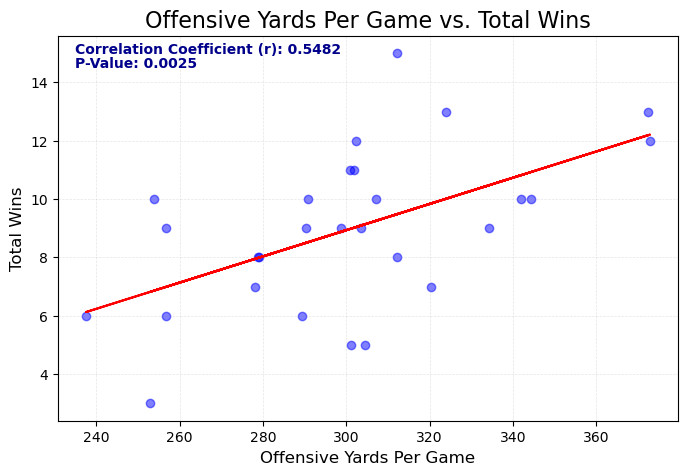

In [331]:
# Offensive Yards per Game
plt.figure(figsize=(8, 5))
plt.scatter(nfl_df['of_yds_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Offensive Yards Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Offensive Yards Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x1 = nfl_df['of_yds_per_g']
y1 = nfl_df['wins']
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['of_yds_per_g'], nfl_df['wins'])
plt.text(235, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(235, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

plt.show()

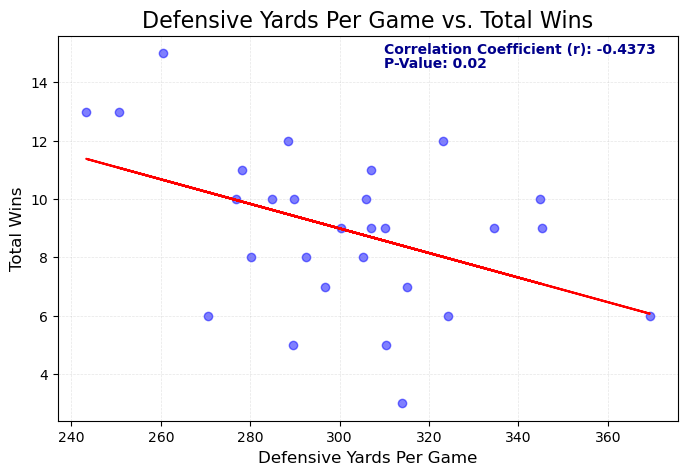

In [332]:
# Defensive Yards per Game
plt.figure(figsize=(8, 5))
plt.scatter(nfl_df['df_yds_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Defensive Yards Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Defensive Yards Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x2 = nfl_df['df_yds_per_g']
y2 = nfl_df['wins']
m, b = np.polyfit(x2, y2, 1)
plt.plot(x2, m*x2 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['df_yds_per_g'], nfl_df['wins'])
plt.text(310, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(310, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

plt.show()


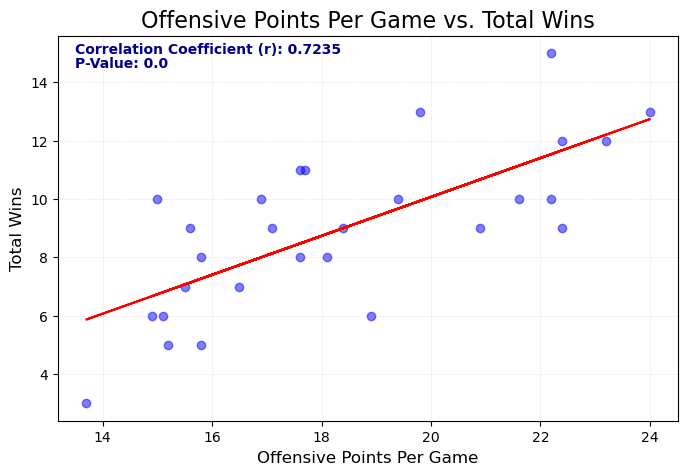

In [333]:
# Offensive Points per Game
plt.figure(figsize=(8, 5))
plt.scatter(nfl_df['of_pts_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Offensive Points Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Offensive Points Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x3 = nfl_df['of_pts_per_g']
y3 = nfl_df['wins']
m, b = np.polyfit(x3, y3, 1)
plt.plot(x3, m*x3 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['of_pts_per_g'], nfl_df['wins'])
plt.text(13.5, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(13.5, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

plt.show()

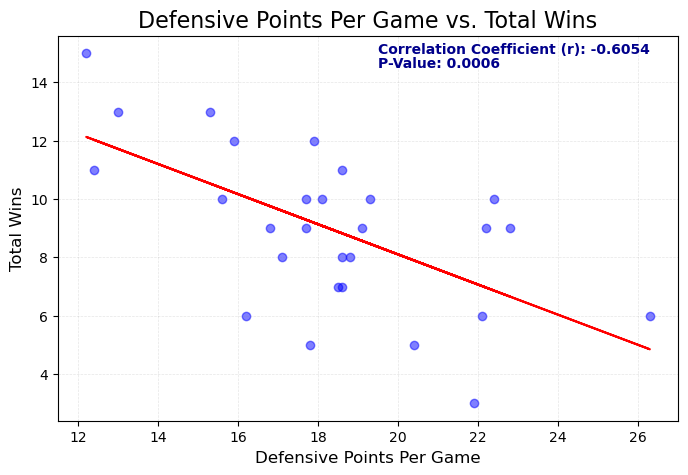

In [334]:
# Defensive Points per Game
plt.figure(figsize=(8, 5))
plt.scatter(nfl_df['df_pts_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Defensive Points Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Defensive Points Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x4 = nfl_df['df_pts_per_g']
y4 = nfl_df['wins']
m, b = np.polyfit(x4, y4, 1)
plt.plot(x4, m*x4 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['df_pts_per_g'], nfl_df['wins'])
plt.text(19.5, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(19.5, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

plt.show()


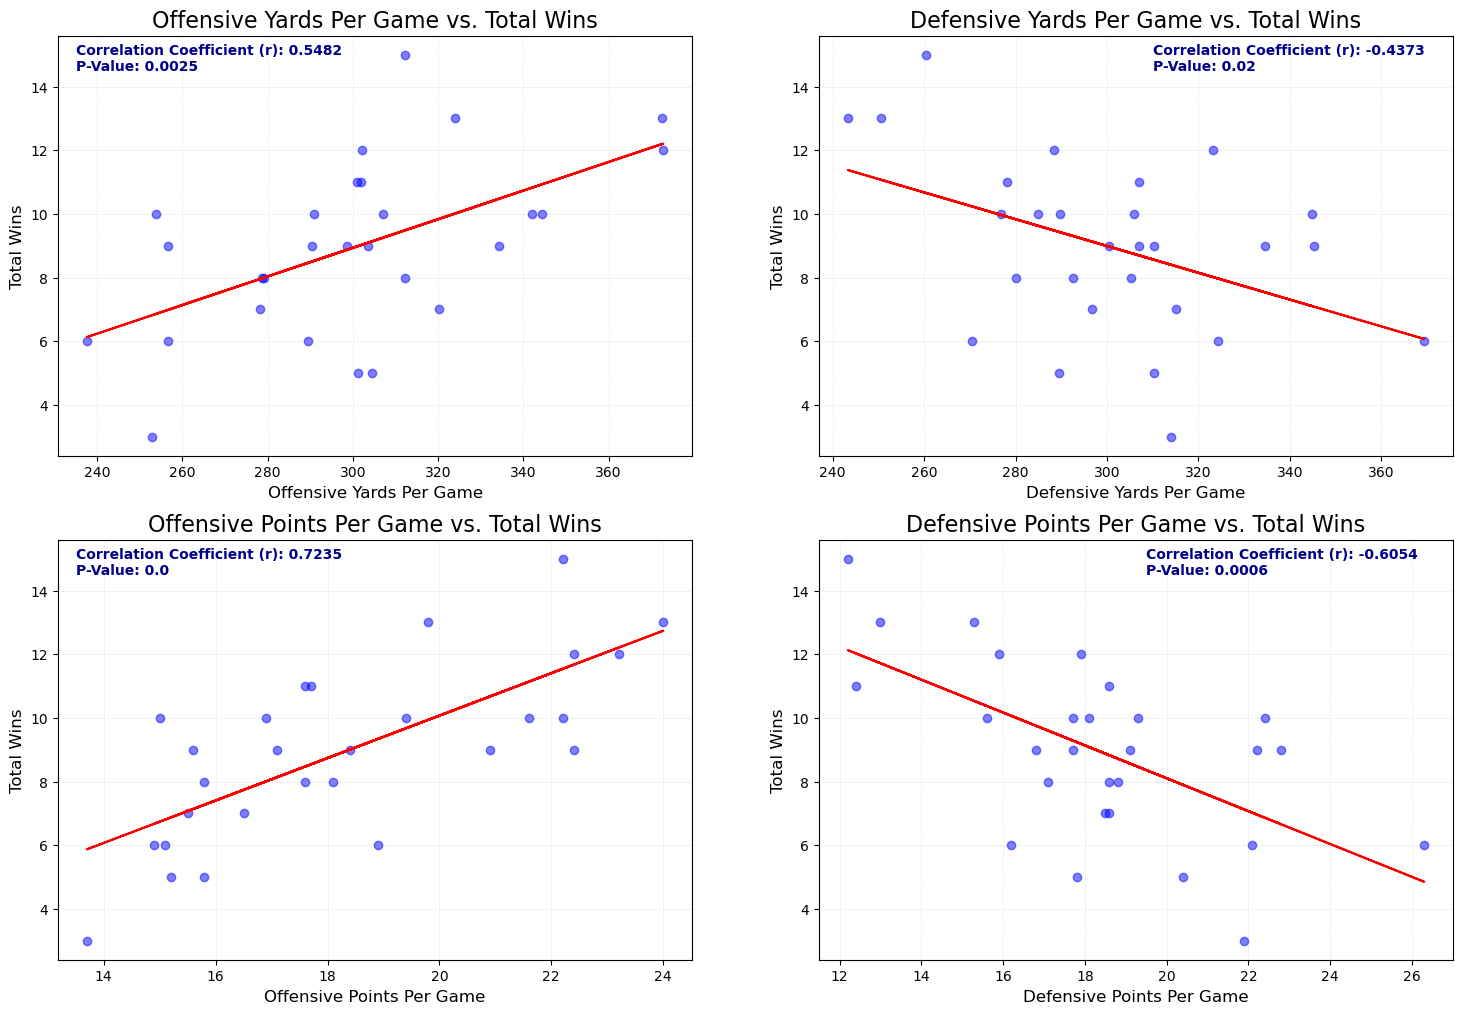

In [335]:
# Create a scatter plot of the data
plt.figure(figsize=(18, 12))
plt.tight_layout()

# Offensive Yards per Game
plt.subplot(2, 2, 1)
plt.scatter(nfl_df['of_yds_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Offensive Yards Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Offensive Yards Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x1 = nfl_df['of_yds_per_g']
y1 = nfl_df['wins']
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['of_yds_per_g'], nfl_df['wins'])
plt.text(235, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(235, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

# Defensive Yards per Game
plt.subplot(2, 2, 2)
plt.scatter(nfl_df['df_yds_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Defensive Yards Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Defensive Yards Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x2 = nfl_df['df_yds_per_g']
y2 = nfl_df['wins']
m, b = np.polyfit(x2, y2, 1)
plt.plot(x2, m*x2 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['df_yds_per_g'], nfl_df['wins'])
plt.text(310, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(310, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

# Offensive Points per Game
plt.subplot(2, 2, 3)
plt.scatter(nfl_df['of_pts_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Offensive Points Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Offensive Points Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x3 = nfl_df['of_pts_per_g']
y3 = nfl_df['wins']
m, b = np.polyfit(x3, y3, 1)
plt.plot(x3, m*x3 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['of_pts_per_g'], nfl_df['wins'])
plt.text(13.5, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(13.5, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

# Defensive Points per Game
plt.subplot(2, 2, 4)
plt.scatter(nfl_df['df_pts_per_g'], nfl_df['wins'], color='blue', marker='o', alpha=0.5)
plt.title('Defensive Points Per Game vs. Total Wins', fontsize=16)
plt.xlabel('Defensive Points Per Game', fontsize=12)
plt.ylabel('Total Wins', fontsize=12)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.2)

# Add a regression line to the scatter plot
x4 = nfl_df['df_pts_per_g']
y4 = nfl_df['wins']
m, b = np.polyfit(x4, y4, 1)
plt.plot(x4, m*x4 + b, color='red')

# Add the correlation coefficient and p-value to the scatter plot
corr_coef, p_val = st.pearsonr(nfl_df['df_pts_per_g'], nfl_df['wins'])
plt.text(19.5, 15, 'Correlation Coefficient (r): ' + str(round(corr_coef, 4)), fontsize=10, color='darkblue', weight='bold')
plt.text(19.5, 14.5, 'P-Value: ' + str(round(p_val, 4)), fontsize=10, color='darkblue', weight='bold')

plt.show()



In [336]:
# Check the correlation between the predictor variables
predictor_corr = nfl_df[['of_yds_per_g', 'df_yds_per_g', 'of_pts_per_g', 'df_pts_per_g']].corr()
predictor_corr

,of_yds_per_g,df_yds_per_g,of_pts_per_g,df_pts_per_g
of_yds_per_g,1.000000,-0.182435,0.771858,-0.174439
df_yds_per_g,-0.182435,1.000000,-0.093380,0.825693
of_pts_per_g,0.771858,-0.093380,1.000000,-0.198643
df_pts_per_g,-0.174439,0.825693,-0.198643,1.000000


In [337]:
# Select the 2 best features for the model
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# Select the features that are not strings
features = nfl_df.select_dtypes(include=['float64', 'int64'])
features = features.drop(columns=['wins'])

# Identify the target / label variable
target = nfl_df['wins']

# Create and run the selector
selector = SelectKBest(f_regression, k=2)
selector.fit_transform(features, target)

best_features = nfl_df[selector.get_feature_names_out()]
best_features.columns

Index(['of_pts_per_g', 'df_pts_per_g'], dtype='object')

In [338]:
# Select the 3 best features for the model
# Create and run the selector
selector2 = SelectKBest(f_regression, k=3)
selector2.fit_transform(features, target)

best_features2 = nfl_df[selector2.get_feature_names_out()]
best_features2.columns

Index(['of_yds_per_g', 'of_pts_per_g', 'df_pts_per_g'], dtype='object')

## Step 3: Single Linear Regression Models

### SLR Model 1: df_yds_per_g vs. wins

In [339]:
# Create a SLR model for df_yds_per_g and wins
slr_model = ols('wins ~ df_yds_per_g', data=nfl_df).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     6.148
Date:                Sun, 19 Nov 2023   Prob (F-statistic):             0.0200
Time:                        02:27:44   Log-Likelihood:                -64.627
No. Observations:                  28   AIC:                             133.3
Df Residuals:                      26   BIC:                             135.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       21.6243      5.128      4.217   

In [340]:
# Calculate the MSE and RMSE for the SLR model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], slr_model.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  5.9202
RMSE:  2.4331


In [341]:
# Predict the number of wins a team will have next season based on the following stats
df_yds = 15


# Y intercept and slope for mlr_model6
y = 21.6243
b1 = -0.0421


# MLR Equation
wins = y + b1 * df_yds 

# Print the predicted number of wins
print('Predicted number of wins: ', round(wins, 0), '\n')

# Calculate the 95% confidence interval for the predicted number of wins
# Calculate the standard error
from scipy.stats import sem
sem = sem(nfl_df['wins'])
print('Standard Error: ', round(sem, 4))

# Calculate the margin of error
from scipy.stats import t
confidence = 0.95
n = len(nfl_df['wins'])
moe = t.ppf(confidence, n-1) * sem
print('Margin of Error: ', round(moe, 4), '\n')

# Calculate the 95% confidence interval
ci = (wins - moe, wins + moe)
# print the 95% confidence interval rounded to 2 decimal places
print('95% Confidence Interval: ', np.round(ci, 2))

Predicted number of wins:  21.0 

Standard Error:  0.5207
Margin of Error:  0.8869 

95% Confidence Interval:  [20.11 21.88]


### SLR Model 2: of_pts_per_g vs. wins

In [342]:
# Create a SLR model for of_pts_per_g and wins
slr_model2 = ols('wins ~ of_pts_per_g', data=nfl_df).fit()
print(slr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     28.57
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.36e-05
Time:                        02:27:44   Log-Likelihood:                -57.221
No. Observations:                  28   AIC:                             118.4
Df Residuals:                      26   BIC:                             121.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.2706      2.318     -1.411   

In [343]:
# Calculate the MSE and RMSE for the SLR model2
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], slr_model2.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  3.4879
RMSE:  1.8676


### SLR Model 3: df_pts_per_g vs. wins

In [344]:
# Create a SLR model for df_pts_per_g and wins
slr_model3 = ols('wins ~ df_pts_per_g', data=nfl_df).fit()
print(slr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     15.04
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           0.000641
Time:                        02:27:44   Log-Likelihood:                -61.208
No. Observations:                  28   AIC:                             126.4
Df Residuals:                      26   BIC:                             129.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.4315      2.477      7.441   

In [345]:
# Calculate the MSE and RMSE for the SLR model3
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], slr_model3.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  4.6372
RMSE:  2.1534


### SLR Model 4: of_yds_per_g vs. wins

In [346]:
# Create a SLR model for of_yds_per_g and wins
slr_model4 = ols('wins ~ of_yds_per_g', data=nfl_df).fit()
print(slr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     11.17
Date:                Sun, 19 Nov 2023   Prob (F-statistic):            0.00253
Time:                        02:27:44   Log-Likelihood:                -62.596
No. Observations:                  28   AIC:                             129.2
Df Residuals:                      26   BIC:                             131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.5583      4.070     -1.120   

In [347]:
# Calculate the MSE and RMSE for the SLR model4
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], slr_model4.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  5.1204
RMSE:  2.2628


## Step 4: Multiple Linear Regression Model

### MLR Model 1: of_yds_per_g, df_yds_per_g, vs. wins

In [348]:
# Create a MLR model for df_yds_per_g, of_yds_per_g, vs wins
mlr_model = ols('wins ~ df_yds_per_g + of_yds_per_g', data=nfl_df).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     8.985
Date:                Sun, 19 Nov 2023   Prob (F-statistic):            0.00115
Time:                        02:27:44   Log-Likelihood:                -60.016
No. Observations:                  28   AIC:                             126.0
Df Residuals:                      25   BIC:                             130.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1130      6.424      1.107   

In [349]:
# Calculate the MSE and RMSE for the MLR model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  4.2589
RMSE:  2.0637


In [350]:
# Predict the number of wins a team will have next season based on the following stats
of_yds = 307
df_yds = 290

# Y intercept and slope for mlr_model 1
y = 7.11
b1 = -0.03
b2 = 0.04

# MLR Equation
wins = y + b1 * df_yds + b2 * of_yds

# Print the predicted number of wins
print('Predicted number of wins: ', round(wins, 0))


# Calculate the 95% confidence interval for the predicted number of wins
new_df = pd.DataFrame({'df_yds_per_g': [df_yds], 'of_yds_per_g': [of_yds]})
pred = mlr_model.get_prediction(new_df)
pred.summary_frame(alpha=0.05)

Predicted number of wins:  11.0


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.574309,0.44445,8.658946,10.489672,4.984056,14.164562


### MLR Model 2: of_yds_per_g, df_yds_per_g, and df_pts_per_g vs. wins

In [351]:
# Create the MLR model for df_yds_per_g and of_yds_per_g vs wins   
mlr_model2 = ols('wins ~ of_yds_per_g + df_yds_per_g + df_pts_per_g', data=nfl_df).fit()
print(mlr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.42e-05
Time:                        02:27:44   Log-Likelihood:                -55.158
No. Observations:                  28   AIC:                             118.3
Df Residuals:                      24   BIC:                             123.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5963      5.783      0.276   

In [352]:
# Calculate the MSE and RMSE for the MLR model2
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model2.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  3.0101
RMSE:  1.735


### MLR Model 3: df_yds_per_g, of_yds_per_g, df_pts_per_g and of_pts_per_g vs. wins

#### Selected Model for Testing and Predictions

In [353]:
# Create the MLR model for df_yds_per_g, of_yds_per_g, df_pts_per_g, of_pts_per_g vs wins
mlr_model3 = ols('wins ~ of_yds_per_g + df_yds_per_g + of_pts_per_g + df_pts_per_g ', data=nfl_df).fit()
print(mlr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     16.98
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           1.31e-06
Time:                        02:27:44   Log-Likelihood:                -48.353
No. Observations:                  28   AIC:                             106.7
Df Residuals:                      23   BIC:                             113.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.6673      4.755      1.192   

In [354]:
# Calculate the MSE and RMSE for the MLR model3
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model3.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  1.8514
RMSE:  1.3607


In [355]:
# Predict the number of wins a team will have next season based on the following stats
of_yds = 307
df_yds = 290
of_pts = 17
df_pts = 20

# Y intercept and slope for mlr_model 1
y = 5.67
b1 = -0.003
b2 = 0.005
b3 = 0.60
b4 = -0.44

# MLR Equation
wins = y + b1 * of_yds + b2 * df_yds + b3 * of_pts + b4 * df_pts

# Print the predicted number of wins
print('Predicted number of wins: ', round(wins, 0))


# Calculate the 95% confidence interval for the predicted number of wins
new_df = pd.DataFrame({'df_yds_per_g': [df_yds], 'of_yds_per_g': [of_yds], 'of_pts_per_g': [of_pts], 'df_pts_per_g': [df_pts]})
pred = mlr_model3.get_prediction(new_df)
pred.summary_frame(alpha=0.05)

Predicted number of wins:  8.0


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.34625,0.54287,6.223239,8.469262,4.043807,10.648693


### MLR Model 4: of_yds_per_g and of_pts_per_g vs. wins

In [356]:
# Create the MLR model for of_yds_per_g and of_pts_per_g vs wins
mlr_model4 = ols('wins ~ of_yds_per_g + of_pts_per_g', data=nfl_df).fit()
print(mlr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     13.75
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           9.39e-05
Time:                        02:27:44   Log-Likelihood:                -57.213
No. Observations:                  28   AIC:                             120.4
Df Residuals:                      25   BIC:                             124.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.9749      3.456     -0.861   

In [357]:
# Calculate the MSE and RMSE for the MLR model4
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model4.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  3.486
RMSE:  1.8671


### MLR Model 5: df_pts_per_g, of_yds_per_g and of_pts_per_g  vs. wins

In [358]:
# Create the MLR model for df_pts_per_g, of_pts_per_g, and of_yds_per_g vs wins
mlr_model5 = ols('wins ~ df_pts_per_g + of_pts_per_g + of_yds_per_g', data=nfl_df).fit()
print(mlr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           2.49e-07
Time:                        02:27:44   Log-Likelihood:                -48.388
No. Observations:                  28   AIC:                             104.8
Df Residuals:                      24   BIC:                             110.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4693      3.295      1.963   

In [359]:
# Calculate the MSE and RMSE for the MLR model5
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model5.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  1.8559
RMSE:  1.3623


### MLR Model 6: df_pts_per_g and of_pts_per_g vs. wins

#### Selected Model for Testing and Predictions

In [360]:
# Create the MLR model for df_pts_per_g and of_pts_per_g vs wins
mlr_model6 = ols('wins ~ df_pts_per_g + of_pts_per_g', data=nfl_df).fit()
print(mlr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                   wins   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     36.60
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           3.74e-08
Time:                        02:27:44   Log-Likelihood:                -48.445
No. Observations:                  28   AIC:                             102.9
Df Residuals:                      25   BIC:                             106.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.8601      2.610      2.245   

In [361]:
# Calculate the MSE and RMSE for the MLR model6
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the MSE
mse = mean_squared_error(nfl_df['wins'], mlr_model6.predict())
print('MSE: ', round(mse, 4))

# Calculate the RMSE
rmse = sqrt(mse)
print('RMSE: ', round(rmse, 4))

MSE:  1.8635
RMSE:  1.3651


## Additional Analysis and Testing on Selected Models

### MLR Model 3 vs. MLR Model 6

## Residual Analysis

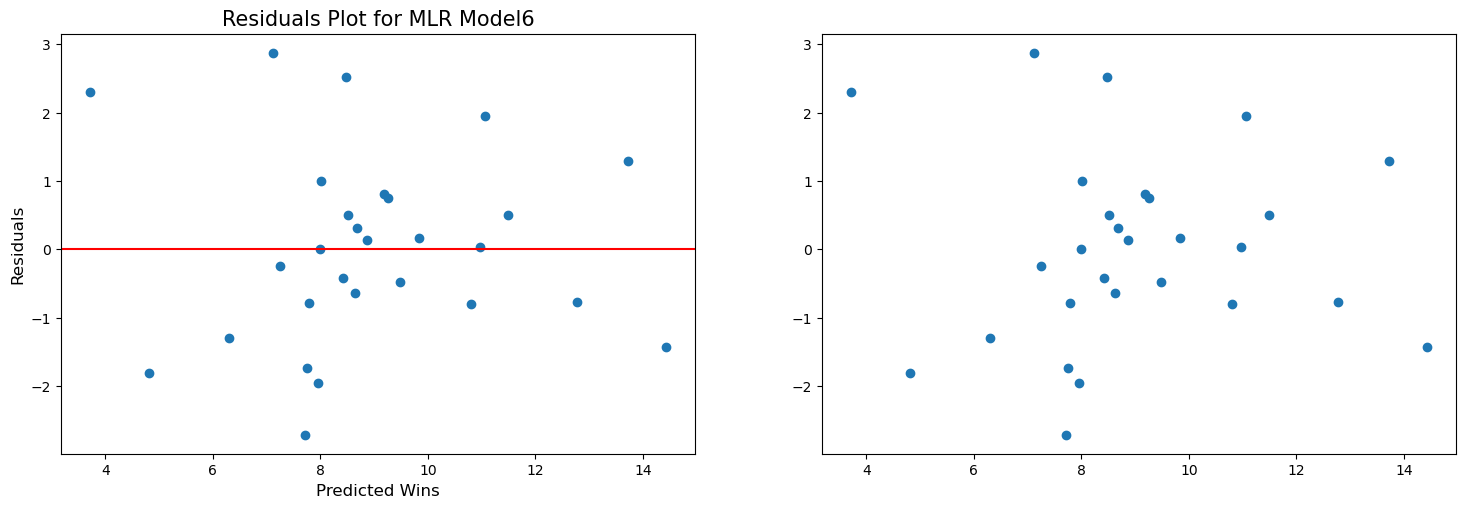

In [362]:
# Create the Residuals plots for the MLR model6
# Create the figure
plt.figure(figsize=(18, 12))
plt.tight_layout()

# Residuals plot for MLR model6
plt.subplot(2, 2, 1)
plt.scatter(mlr_model6.predict(), mlr_model6.resid)
plt.axhline(y=0, color='red')
plt.title('Residuals Plot for MLR Model6', fontsize=15)
plt.xlabel('Predicted Wins', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.subplot(2, 2, 2)
plt.scatter(mlr_model6.predict(), mlr_model6.resid)


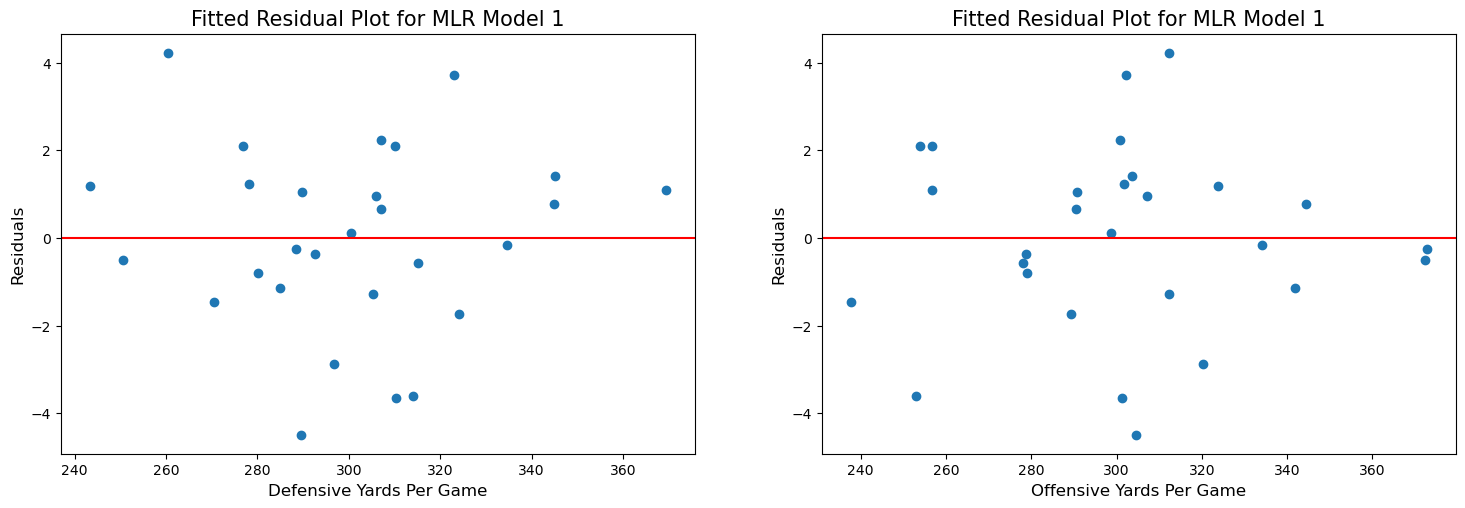

In [363]:
# Create the Fitted residual plots for mlr_model1
x1 = nfl_df['df_yds_per_g']
x2 = nfl_df['of_yds_per_g']

Y3 = mlr_model.resid

# Create the figure
plt.figure(figsize=(18, 12))
plt.tight_layout()

# Fitted residual plot for mlr_model1
plt.subplot(2, 2, 1)
plt.scatter(x1, Y3)
plt.axhline(y=0, color='red')
plt.title('Fitted Residual Plot for MLR Model 1', fontsize=15)
plt.xlabel('Defensive Yards Per Game', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.subplot(2, 2, 2)
plt.scatter(x2, Y3)
plt.axhline(y=0, color='red')
plt.title('Fitted Residual Plot for MLR Model 1', fontsize=15)
plt.xlabel('Offensive Yards Per Game', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

plt.show()


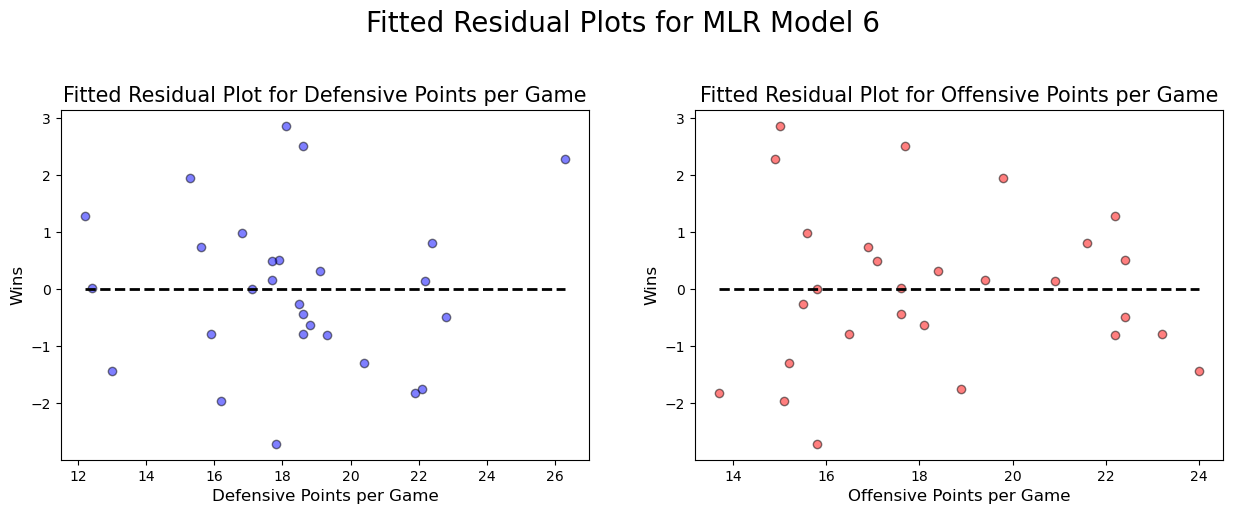

In [364]:
# Create the fitted residual plots for mlr_model6
x3 = nfl_df['df_pts_per_g']
x4 = nfl_df['of_pts_per_g']
Y6 = mlr_model6.resid



# Create the figure
plt.figure(figsize=(15, 10))
plt.tight_layout()

plt.subplot(2, 2, 1)
plt.scatter(x=x3, y=Y6, color='blue', alpha=0.5, edgecolors='k')
xmin = x3.min()
xmax = x3.max()
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='black', linestyles='--', lw=2)
plt.title('Fitted Residual Plot for Defensive Points per Game', fontsize=15)
plt.xlabel('Defensive Points per Game', fontsize=12)
plt.ylabel('Wins', fontsize=12)

plt.subplot(2, 2, 2)
plt.scatter(x=x4, y=Y6, color='red', alpha=0.5, edgecolors='k')
xmin = x4.min()
xmax = x4.max()
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='black', linestyles='--', lw=2)
plt.title('Fitted Residual Plot for Offensive Points per Game', fontsize=15)
plt.xlabel('Offensive Points per Game', fontsize=12)
plt.ylabel('Wins', fontsize=12)

# Add figure title
plt.suptitle('Fitted Residual Plots for MLR Model 6', fontsize=20)
plt.show()





In [365]:
# Create VIF for mlr_model3
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Create the X and y matrices
y3, X3 = dmatrices('wins ~ df_yds_per_g + of_yds_per_g + df_pts_per_g + of_pts_per_g', data=nfl_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X3.values, i+1) for i in range(X3.shape[1]-1)]
print(vif.round(3))


   VIF Factor
0       3.427
1       2.657
2       3.433
3       2.713


In [366]:
# Create VIF for mlr_model6

# Create the X and Y matrices for the model
y6, X6 = dmatrices('wins ~ df_pts_per_g + of_pts_per_g', data=nfl_df, return_type='dataframe')

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X6.values, i+1) for i in range(X6.shape[1]-1)]
print(vif.round(3))

   VIF Factor
0       1.041
1       1.041


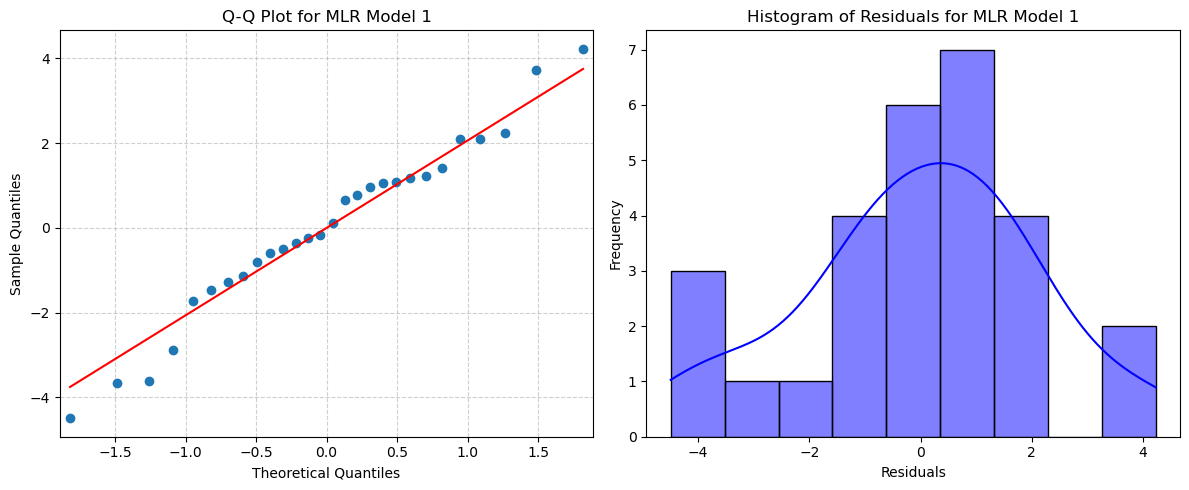

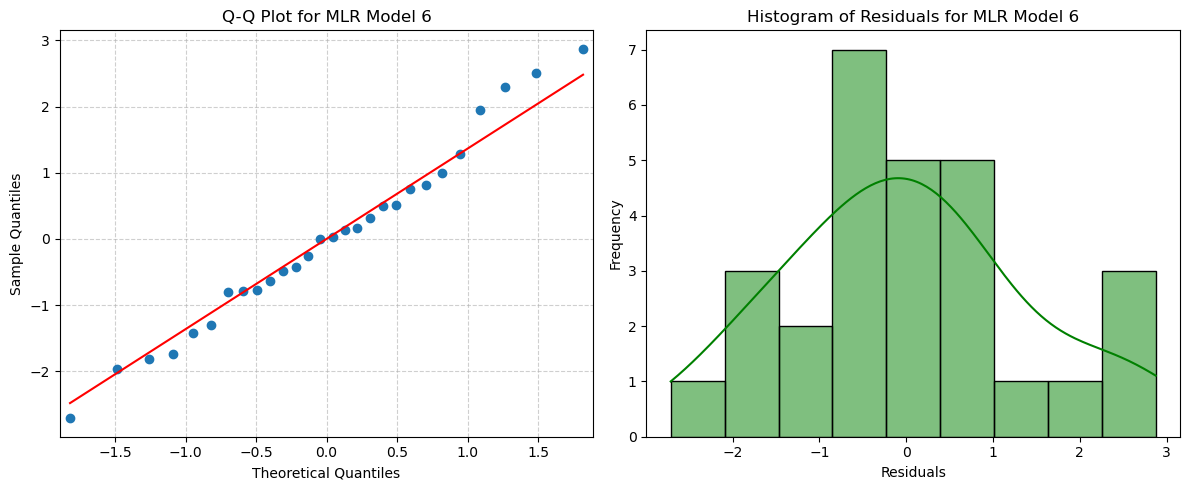

In [367]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to create Q-Q plots and histograms for a given model
def plot_residuals(model, title, color):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Q-Q plot with a colored line
    sm.qqplot(model.resid, line='s', ax=axes[0])
    axes[0].set_title(f'Q-Q Plot for {title}')
    axes[0].set_xlabel('Theoretical Quantiles')
    axes[0].set_ylabel('Sample Quantiles')
    axes[0].grid(True, linestyle='--', alpha=0.6) 
      
    # Histogram with color and labels
    sns.histplot(model.resid, bins=9, kde=True, color=color, ax=axes[1])
    axes[1].set_title(f'Histogram of Residuals for {title}')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot the residuals for mlr_model3 with a blue color
plot_residuals(mlr_model, "MLR Model 1", color='blue')

# Plot the residuals for mlr_model6 with a green color
plot_residuals(mlr_model6, "MLR Model 6", color='green')


In [373]:
# Calculate the MSE for mlr_model6
from sklearn.metrics import mean_squared_error

# Create the X and Y matrices for the model
y, X = dmatrices('wins ~ df_yds_per_g + of_yds_per_g', data=nfl_df, return_type='dataframe')

# Create the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3)

# Create the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the MSE for the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Mean Squared Error for MLR Model 1')
print('Training Set: ', round(mean_squared_error(y_train, y_train_pred), 4))
print('Testing Set: ', round(mean_squared_error(y_test, y_test_pred), 4))

# Calculate the RMSE for mlr_model6
from sklearn.metrics import mean_squared_error

# Create the X and Y matrices for the model
y, X = dmatrices('wins ~ df_yds_per_g + of_yds_per_g', data=nfl_df, return_type='dataframe')

# Create the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3)

# Create the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the RMSE for the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Root Mean Squared Error for MLR Model 1')
print('Training Set: ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('Testing Set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))



Mean Squared Error for MLR Model 1
Training Set:  3.7628
Testing Set:  5.6376
Root Mean Squared Error for MLR Model 1
Training Set:  1.9398
Testing Set:  2.3744


In [369]:
# Calculate the MSE for mlr_model6
from sklearn.metrics import mean_squared_error

# Create the X and Y matrices for the model
y, X = dmatrices('wins ~ df_pts_per_g + of_pts_per_g', data=nfl_df, return_type='dataframe')

# Create the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3)

# Create the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the MSE for the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Mean Squared Error for MLR Model 6')
print('Training Set: ', round(mean_squared_error(y_train, y_train_pred), 4))
print('Testing Set: ', round(mean_squared_error(y_test, y_test_pred), 4))

# Calculate the RMSE for mlr_model6
from sklearn.metrics import mean_squared_error

# Create the X and Y matrices for the model
y, X = dmatrices('wins ~ df_pts_per_g + of_pts_per_g', data=nfl_df, return_type='dataframe')

# Create the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.3)

# Create the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the RMSE for the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Root Mean Squared Error for MLR Model 6')
print('Training Set: ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('Testing Set: ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))



Mean Squared Error for MLR Model 6
Training Set:  2.1976
Testing Set:  1.2638
Root Mean Squared Error for MLR Model 6
Training Set:  1.4824
Testing Set:  1.1242


## Predictions and Confidence Intervals with Final Model
### Final Model: MLR Model 6

In [370]:
# Predict the number of wins a team will have next season based on the following stats
of_pts = 15
df_pts = 7

# Y intercept and slope for mlr_model6
y = 5.8601
b1 = -0.4100
b2 = 0.5791

# MLR Equation
wins = y + b1 * df_pts + b2 * of_pts

# Print the predicted number of wins
print('Predicted number of wins: ', round(wins, 0))

Predicted number of wins:  12.0


In [371]:
# Calculate the 95% confidence interval for the predicted number of wins
new_df = pd.DataFrame({'df_pts_per_g': [df_pts], 'of_pts_per_g': [of_pts]})
pred = mlr_model6.get_prediction(new_df)
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.676692,1.136226,9.336591,14.016792,7.89131,15.462074


## Prediction Program Using Final Model

#### The program will ask the user to input the following variables:
- Offensive points per game
- Defensive points per game

#### The program will output the following:
- Predicted number of wins
- 95% confidence interval for the predicted number of wins


In [372]:
# Create an input program for the user to enter the number of points scored and allowed

# Create the input program
print('Welcome to the NFL Predictor Program!', '\n')
print('This program will predict the number of wins your favorite NFL team will have next season.', '\n')



# Create the input for the number of points scored and allowed
# Only integers are allowed for the input but will be stored as a float
# ValueErrors will be raised if the input is not an integer
print('Please enter the number of points your favorite team scored last season.')
of_pts = int(input())

if of_pts < 0:
    raise ValueError('Please enter a positive integer.')
else:
    print(of_pts, '\n')
    
print('Please enter the number of points your favorite team allowed last season.')

df_pts = int(input())

if df_pts < 0:
    raise ValueError('Please enter a positive integer.')
else:
    print(df_pts, '\n')

# Y intercept and slope for mlr_model6
y = 5.8601
b1 = -0.4100
b2 = 0.5791

# MLR Equation
wins = y + b1 * df_pts + b2 * of_pts

# Calculate the 95% confidence interval for the predicted number of wins
new_df = pd.DataFrame({'df_pts_per_g': [df_pts], 'of_pts_per_g': [of_pts]})
pred = mlr_model6.get_prediction(new_df)


# Print the predicted number of wins
print('Predicted number of wins: ', round(wins, 0), '\n')

# Print the 95% confidence interval for the predicted number of wins
print('95% Confidence Interval for the Predicted Number of Wins')
print(pred.summary_frame(alpha=0.05))

Welcome to the NFL Predictor Program! 

This program will predict the number of wins your favorite NFL team will have next season. 

Please enter the number of points your favorite team scored last season.
5 

Please enter the number of points your favorite team allowed last season.
5 

Predicted number of wins:  7.0 

95% Confidence Interval for the Predicted Number of Wins
       mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  6.705616  1.90749       2.777066      10.634167      1.777477     11.633755
